In [4]:
import fireworks
from fireworks.nbodylib import dynamics as dyn
from fireworks.nbodylib import integrators as intg
from fireworks import ic
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def evolve(particles,integrator):
        

    period = 10
    tstep = .001

    tot_time = 0 

    acc_list = []
    potential_list = []
    positions = []
    velocities = []
    energy = []


    init_energy = particles.Etot()

    while tot_time < 10*period:
        tot_time +=tstep

        # Evolve the binary 

        (particles, tstep, acc, jerk, potential) = integrator(particles=particles, 
                                                                            tstep=tstep,
                                                                            acceleration_estimator=dyn.acceleration_direct_vectorized,
                                                                            softening=0.)
        
        acc_list.append(acc)
        potential_list.append(potential)
        positions.append(particles.pos)
        velocities.append(particles.vel)
        energy.append(particles.Etot())
        
    acc_list = np.array(acc_list).reshape(len(acc_list),2,3)
    potential_list = np.array(potential_list)
    positions = np.array(positions).reshape(len(positions),2,3)
    velocities = np.array(velocities).reshape(len(velocities),2,3)
    energy = np.array(energy)
    return (acc_list, potential_list, positions, velocities, energy)

/root/miniconda3/lib/python3.10/site-packages/fireworks/particles.py:173: RuntimeWarning: divide by zero encountered in divide
  Epot = -0.5 * np.sum(mass_product[:,:,np.newaxis] / np.sqrt(rij**2 + softening**2))


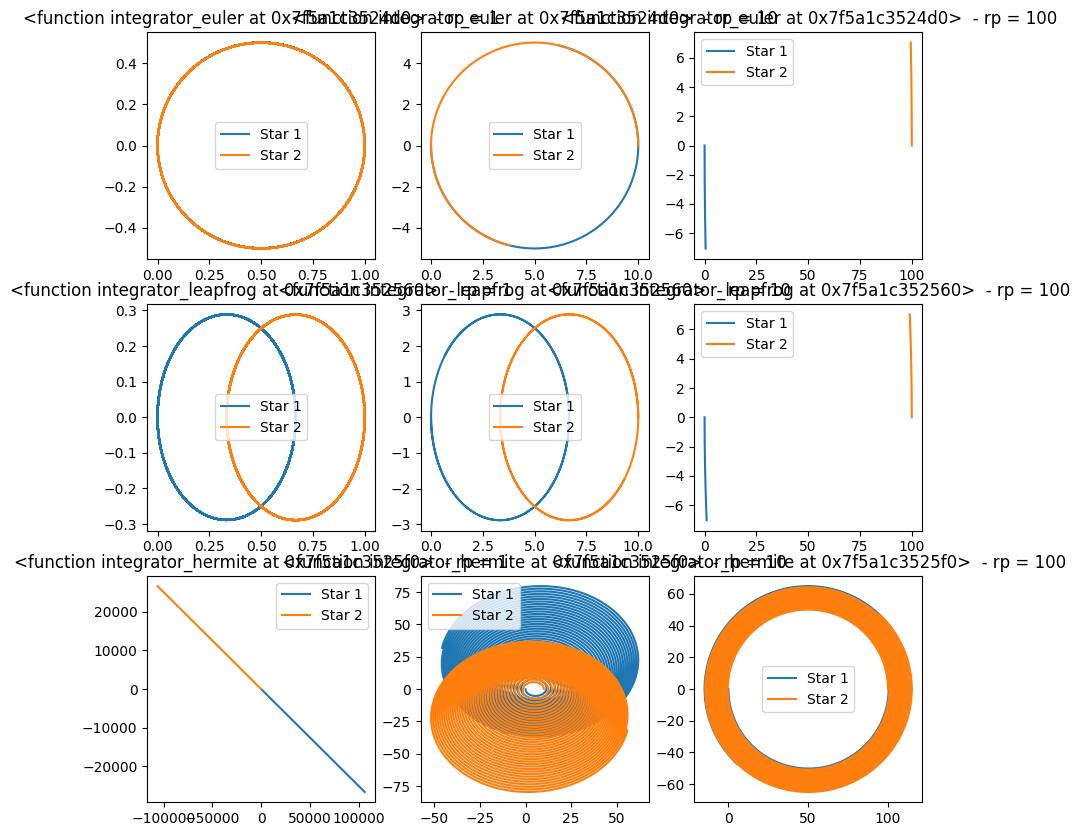

In [7]:
distances = [1,10,100]
integrators = [intg.integrator_euler, intg.integrator_leapfrog, intg.integrator_hermite]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))


for i,integrator in enumerate(integrators):

    for j,d in enumerate(distances):
        particles = ic.ic_two_body(mass1=1,mass2=1,rp=d,e=0)
        (acc_list, potential_list, positions, velocities, energy) = evolve(particles,integrator)

        ax[i,j].plot(positions[:, 0, 0], positions[:, 0, 1], label='Star 1')
        ax[i,j].plot(positions[:, 1, 0], positions[:, 1, 1], label='Star 2')

        ax[i,j].set_title(f"{integrator}  - rp = {d}")

        ax[i,j].legend()
        
        fig.savefig(f"img/{integrator}  - rp = {d}.png")